# 第一章 数据

+ ## 数据操作

In [5]:
import torch

x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [6]:
x.shape

torch.Size([12])

In [7]:
x.numel()

12

In [8]:
x.reshape(2, 6)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])

In [11]:
torch.zeros((2, 4, 6))

tensor([[[0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.]]])

In [12]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [13]:
torch.randn(3, 4)

tensor([[-0.2935,  0.7789,  0.7530,  0.3024],
        [ 0.2502,  0.2945, -0.2195,  1.0105],
        [-1.3910,  0.2468, -1.2968,  0.7341]])

In [14]:
torch.tensor([[2, 1, 4, 4], [8, 7, 6, 5], [1, 3, 7, 9]])

tensor([[2, 1, 4, 4],
        [8, 7, 6, 5],
        [1, 3, 7, 9]])

In [17]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [19]:
# 张量连接
m = torch.arange(12, dtype=torch.float32).reshape(3, 4)
n = torch.tensor([[2, 1, 4, 4], [8, 7, 6, 5], [1, 3, 7, 9]])
torch.cat((m, n), dim=0), torch.cat((m, n), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  4.],
         [ 8.,  7.,  6.,  5.],
         [ 1.,  3.,  7.,  9.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  4.],
         [ 4.,  5.,  6.,  7.,  8.,  7.,  6.,  5.],
         [ 8.,  9., 10., 11.,  1.,  3.,  7.,  9.]]))

+ ## 数据预处理

In [21]:
import os

os.makedirs(os.path.join('..', 'data_ai_demo'), exist_ok=True)     # os.path.join？？？？
data_file = os.path.join('..', 'data_ai_demo', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')
    f.write('NA,Pave,127500\n')
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [22]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [25]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]   # iloc 取值左闭右开
print(inputs)
inputs = inputs.fillna(inputs.mean())  # fillna：Fill NA/NaN values using the specified method.
print(inputs)

   NumRooms Alley
0       NaN  Pave
1       2.0   NaN
2       4.0   NaN
3       NaN   NaN
   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


  + 对于inputs中的类别值或离散值，我们将“NaN”视为一个类别

In [26]:
inputs = pd.get_dummies(inputs, dummy_na=True)          #get_dummies ??
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


  + 现在inputs和outputs中的所有条目都是数值类型，它们可以转换为张量格式

In [27]:
import torch

X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

# 第二章

In [1]:
import torch
x = torch.empty(5,3)
print(x)

tensor([[-7.4357e+06,  6.4460e-43, -7.4357e+06],
        [ 6.4460e-43, -7.4357e+06,  6.4460e-43],
        [-7.4357e+06,  6.4460e-43, -7.4357e+06],
        [ 6.4460e-43, -7.4357e+06,  6.4460e-43],
        [-7.4357e+06,  6.4460e-43, -7.4357e+06]])


In [2]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

print('features:', features[0],'\nlabel:', labels[0])

d:\miniconda\miniconda1\envs\d2l\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] 找不到指定的程序。
  warn(f"Failed to load image Python extension: {e}")


features: tensor([-1.6549,  0.6211]) 
label: tensor([-1.2140])


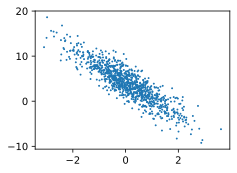

In [3]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
        
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.2120,  0.6030],
        [-0.1603, -1.2692],
        [-1.0519,  3.5502],
        [-0.8437,  0.1429],
        [ 1.3761, -0.9203],
        [-0.4331, -0.1572],
        [ 0.2452,  0.9380],
        [ 0.5688,  2.7663],
        [ 0.7159, -0.6262],
        [-0.4932, -1.0097]]) 
 tensor([[ 2.5752],
        [ 8.1910],
        [-9.9519],
        [ 2.0294],
        [10.0910],
        [ 3.8620],
        [ 1.5032],
        [-4.0648],
        [ 7.7683],
        [ 6.6307]])


In [15]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)


In [16]:
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

In [17]:
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [18]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [19]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.037038
epoch 2, loss 0.000146
epoch 3, loss 0.000052


In [20]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0006, -0.0011], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0009], grad_fn=<RsubBackward1>)


# 第五章 CNN

In [4]:
import torch
from torch import nn

def corr2d(X, K):
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i: i + h, j: j + w] * K).sum()
    return Y

In [5]:
x = torch.tensor([[0,1,2],[3,4,5],[6,7,8]])
k = torch.tensor([[0,1],[2,3]])
print(x)
print(k)
corr2d(x,k)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([[0, 1],
        [2, 3]])


tensor([[19., 25.],
        [37., 43.]])

# 第六章 RNN--循环神经网络